Pymaceutical Analysis

Having this animal study that included 249 mice who were identified with SCC tumors and received treatment with 10 different drug regiments, over the course of 45 days I can say that it a good study to compare a performance of Capomulin against the other treatment drugs.  

From analysis(Bar Charts) it can be concluded that Capomulin(230) and Remicane(228) are most used drugs, while the Propriva (148) is the least used drug. Looking into Pie charts it can be seen that slightly more male mice(51%) were used during this study then female mice(49%).

Box Plot shows that drugs Capomulin and Ramicane achived better results than other two compared drug treatments Infubinol and Ceftamin. The results show that with those two drug treatment(Capomulin and Ramicane) final tumor volume is smaller. Also the good results od Capomulin treatment is shown by looking into singe Mouse l509 treatment with this drug. It is noticeable that by using Capomulin on this mouse longer,during this 45 days, the tumor volume decreased and it is nicely presented with line plot. 

Last, scatter plot (mouse weight vs average tumore volume (mm3)) shows that there is positive correlation with tumor volume and mouse weight. This statement is proven with calculation of correlation coefficient,r=0.84 which presents strong correlation between them. 



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "/Users/jelenaraonic/UTOR-VIRT-DATA-PT-02-2024-U-LOLC/Module5-Challenge/Starter_Code/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "/Users/jelenaraonic/UTOR-VIRT-DATA-PT-02-2024-U-LOLC/Module5-Challenge/Starter_Code/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_combine_df = pd.merge(mouse_metadata, study_results, how="right", on=["Mouse ID"])
data_combine_df.head(10)



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0
5,h246,Ketapril,Male,13,30,0,45.0,0
6,p189,Ketapril,Male,8,28,0,45.0,0
7,n923,Ketapril,Male,19,30,0,45.0,0
8,q119,Ketapril,Male,17,30,0,45.0,0
9,f993,Naftisol,Male,21,28,0,45.0,0


In [2]:
#check the number of mice

mice_number = len(data_combine_df["Mouse ID"].unique())
print(mice_number)


249


In [3]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = data_combine_df.loc[data_combine_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [4]:

# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = data_combine_df.loc[data_combine_df["Mouse ID"] == "g989"]


# Create a clean DataFrame by dropping the duplicate mouse by its ID.
non_duplicate_data = data_combine_df[data_combine_df['Mouse ID'].isin(duplicate_mouse_ids)==False]
non_duplicate_data.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0
5,h246,Ketapril,Male,13,30,0,45.0,0
6,p189,Ketapril,Male,8,28,0,45.0,0
7,n923,Ketapril,Male,19,30,0,45.0,0
8,q119,Ketapril,Male,17,30,0,45.0,0
9,f993,Naftisol,Male,21,28,0,45.0,0


In [5]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice_number = len(non_duplicate_data["Mouse ID"].unique())
print(cleaned_mice_number)


248


SUMMARY STATISTICS

In [6]:
# The mean of the tumor volume for each regimen 
mean_tv =  non_duplicate_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

# The median of the tumor volume for each regimen
median_tv =  non_duplicate_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()

#The variance of the tumor volume for each regimen
variance_tv =  non_duplicate_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()

#Standard deviation of the tumor volume for each regimen
sd_tv =  non_duplicate_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()

#SEM of the tumor volume for each regimen
sem =  non_duplicate_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

In [7]:
# Assemble the resulting series into a single summary DataFrame.

summary_stat = pd.DataFrame ({"Mean Tumor Volume": mean_tv,
                              "Median Tumor Volume": median_tv,
                              "Tumor Volume Variance": variance_tv,
                              "Tumor Volume Std. Dev.": sd_tv,
                              "Tumor Volume Std.Err.": sem})

summary_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Using the aggregation method, produce the same summary statistics in a single line

summary_stat2 = non_duplicate_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(["mean","median","var","std","sem"])
summary_stat2                                           

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

BAR AND PIE CHARTS (using Pandas and Matplotlib's methods)

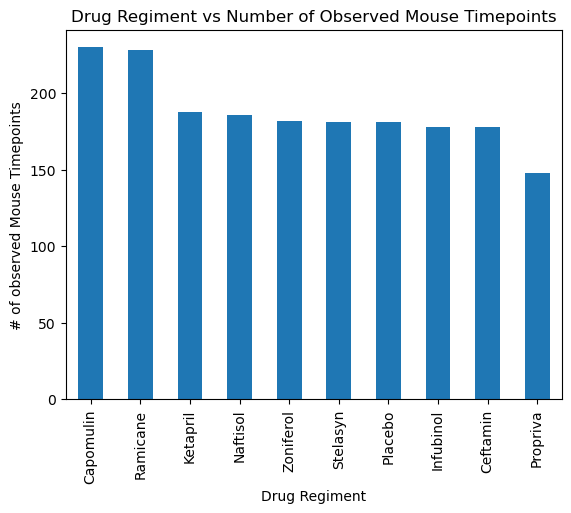

<Figure size 800x400 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

counts = non_duplicate_data['Drug Regimen'].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regiment")
plt.ylabel("# of observed Mouse Timepoints")
plt.title("Drug Regiment vs Number of Observed Mouse Timepoints")
plt.figure(figsize=(8,4))
plt.show()


In [10]:
#Needed data for creating Bar chart 
counts = non_duplicate_data['Drug Regimen'].value_counts()
print(counts)

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64


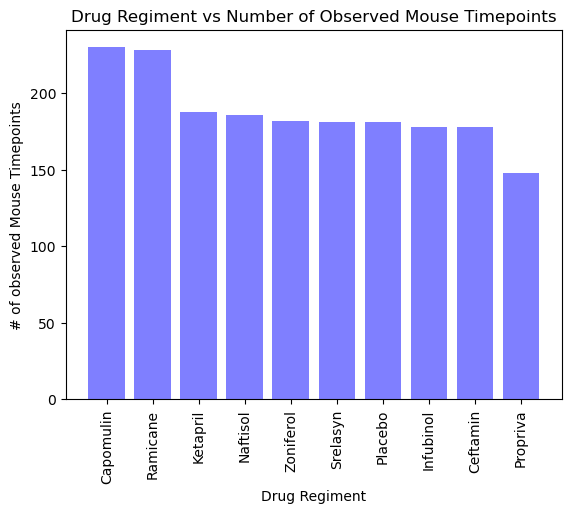

<Figure size 800x400 with 0 Axes>

In [11]:
#Create the bar chart with Matplotlib's method

x_axis = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Srelasyn", "Placebo", "Infubinol", "Ceftamin","Propriva"]
y_axis = [230, 228, 188, 186, 182, 181,181, 178, 178, 148]

plt.bar(x_axis,y_axis,color = 'b', alpha=0.5, align="center")
plt.xlabel("Drug Regiment")
plt.ylabel("# of observed Mouse Timepoints")
plt.title("Drug Regiment vs Number of Observed Mouse Timepoints")
plt.xticks(rotation = "vertical")
plt.figure(figsize=(8,4))
plt.show()



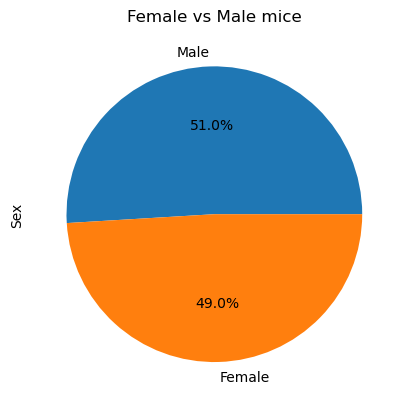

In [12]:
# Generate a Pie plot showing the distribution of female versus male mice using Pandas

counts = non_duplicate_data['Sex'].value_counts()
counts.plot(kind="pie", autopct="%1.1f%%")
plt.ylabel("Sex")
plt.title("Female vs Male mice")
plt.show()

In [13]:
#Needed data for creating Bar chart 
counts = non_duplicate_data['Sex'].value_counts()
print(counts)

Sex
Male      958
Female    922
Name: count, dtype: int64


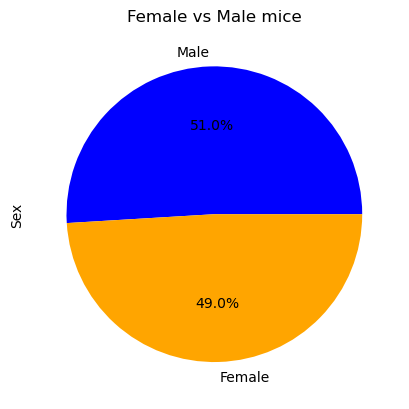

In [14]:
# Generate a Pie plot showing the distribution of female versus male mice using pyplot
gender = ["Male", "Female"]
number = [958,922]
colors = ["blue","orange"]
explode = (0.1,0)

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(number,labels=gender, colors=colors,
        autopct="%1.1f%%", startangle=0)

plt.ylabel("Sex")
plt.title("Female vs Male mice")
plt.show()

QUARTILES, OUTLINERS AND BOX PLOTS

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint_eachmouse = non_duplicate_data.groupby(["Mouse ID"])["Timepoint"].max()
greatest_timepoint_eachmouse = greatest_timepoint_eachmouse.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_together = pd.merge(greatest_timepoint_eachmouse,non_duplicate_data, on = ["Mouse ID","Timepoint"], how="left")
merge_together.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [16]:
# Put treatments into a list for for loop (and later for plot labels)

Most_promising_drugs = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

Tumor_volume = []

for x in Most_promising_drugs:

    total_tumor_volume = merge_together.loc[merge_together["Drug Regimen"] == x, "Tumor Volume (mm3)"]
    Tumor_volume.append(total_tumor_volume)


    quartiles = total_tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    upper_bound = upperq + (1.5*iqr)
    lower_bound = lowerq - (1.5*iqr)
    outliers = total_tumor_volume.loc[(total_tumor_volume < lower_bound)|( total_tumor_volume > upper_bound)]

    print(f"---------------------------------------------------")
    print(f"The lower quartile of {x} is: {lowerq}")
    print(f"The upper quartile of {x} is: {upperq}")
    print(f"The interquartile range of {x} is: {iqr}")
    print(f"Values below {lower_bound} could be {x} outliers.")
    print(f"Values above {upper_bound} could be {x} outliers.")
    print(f"Outliers are {outliers}")
   



---------------------------------------------------
The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
Values below 20.70456164999999 could be Capomulin outliers.
Values above 51.83201549 could be Capomulin outliers.
Outliers are Series([], Name: Tumor Volume (mm3), dtype: float64)
---------------------------------------------------
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
Values below 17.912664470000003 could be Ramicane outliers.
Values above 54.30681135 could be Ramicane outliers.
Outliers are Series([], Name: Tumor Volume (mm3), dtype: float64)
---------------------------------------------------
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
Values below 36.8329049

<function matplotlib.pyplot.show(close=None, block=None)>

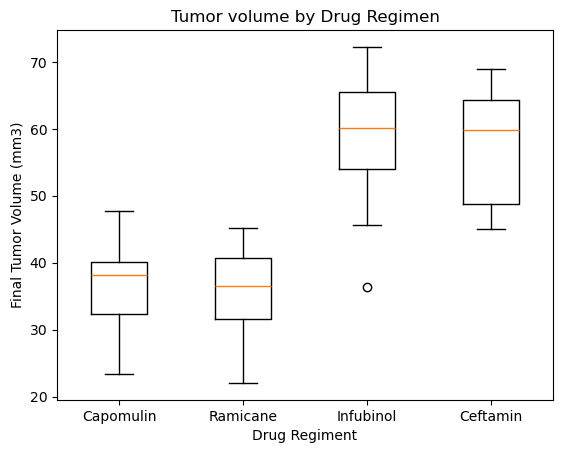

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

result = []
for x in Most_promising_drugs:
    total_tumor_volume = merge_together.loc[merge_together["Drug Regimen"] == x, "Tumor Volume (mm3)"]
    result.append(total_tumor_volume)

Most_promising_drugs = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
plt.boxplot(result, labels= Most_promising_drugs)
plt.xlabel("Drug Regiment")
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Tumor volume by Drug Regimen")
plt.show


LINE PLOTS AND SCATTER PLOT

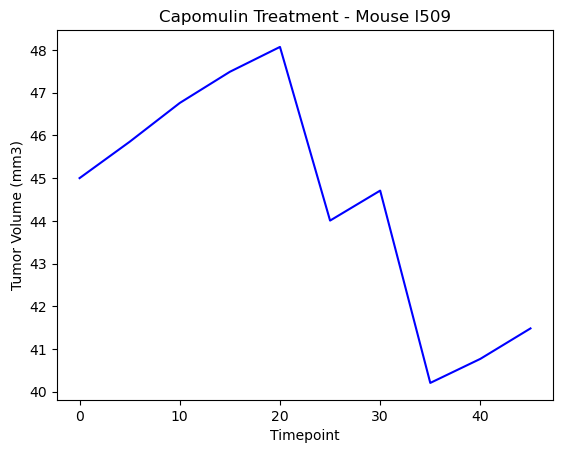

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_mice = non_duplicate_data.loc[non_duplicate_data["Drug Regimen"] == "Capomulin"]
capomulin_mice.head(30)

mice_I509 = capomulin_mice.loc[non_duplicate_data["Mouse ID"] == "l509"]
mouse_I509_volume_time = mice_I509.iloc[:,[5,6]]
mouse_I509_volume_time.head()
x_axis = mouse_I509_volume_time["Timepoint"]
y_axis = mouse_I509_volume_time ["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis, color='b')
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment - Mouse l509")
plt.show()

Text(0.5, 1.0, 'Mouse Weight vs Average Tumor Volume')

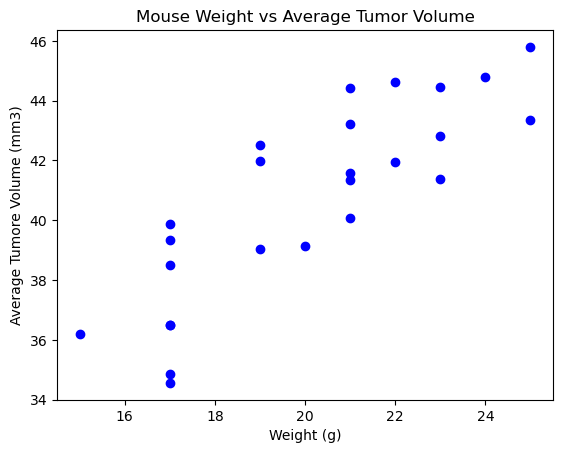

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_mice = non_duplicate_data.loc[non_duplicate_data["Drug Regimen"] == "Capomulin"]
capolumin_regime = capomulin_mice.groupby(["Mouse ID"])[["Weight (g)", "Tumor Volume (mm3)"]].mean()
capolumin_regime.head(20)

plt.scatter(capolumin_regime["Weight (g)"], capolumin_regime["Tumor Volume (mm3)"], marker= "o", color='b')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumore Volume (mm3)")
plt.title("Mouse Weight vs Average Tumor Volume")


CORRELATION AND REGRESSION

In [20]:
# Calculate the correlation coefficient for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(capolumin_regime["Weight (g)"],capolumin_regime["Tumor Volume (mm3)"])
print(f'The colleration between the mouse weight and average tumor volume is {round(correlation[0],2)}')
                    

The colleration between the mouse weight and average tumor volume is 0.84


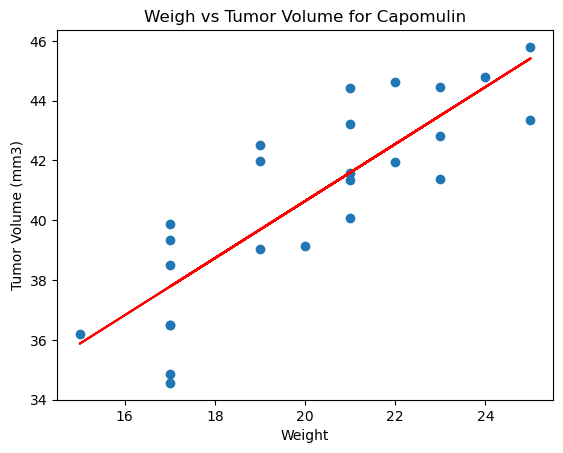

In [21]:
#Calculate a linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capolumin_regime["Weight (g)"], capolumin_regime["Tumor Volume (mm3)"])

regress_value = capolumin_regime["Weight (g)"] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(capolumin_regime["Weight (g)"], capolumin_regime["Tumor Volume (mm3)"])
plt.plot(capolumin_regime["Weight (g)"],regress_value,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Weigh vs Tumor Volume for Capomulin")
plt.show()